In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [32]:
before = np.array([278, 230, 208, 224, 446, 365, 360, 292, 245, 245, 296])
after = np.array([277, 211, 205, 235, 424, 345, 341, 287, 219, 200, 254])
diffs = np.abs(after - before)
mean_diff = diffs.mean()
mean_diff

19.363636363636363

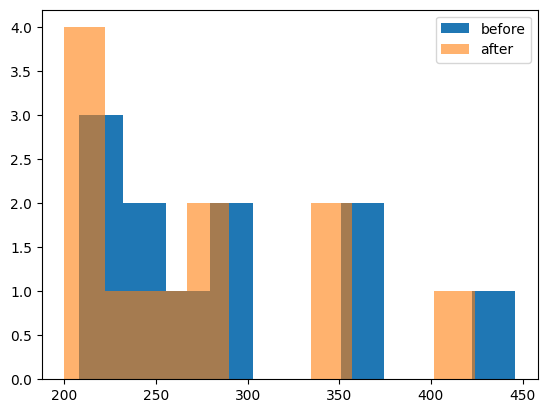

In [33]:
plt.hist(before, bins=10, label='before')
plt.hist(after, bins=10, alpha=0.6, label='after')
plt.legend()

(array([3., 0., 1., 0., 4., 1., 0., 0., 0., 2.]),
 array([ 1. ,  5.4,  9.8, 14.2, 18.6, 23. , 27.4, 31.8, 36.2, 40.6, 45. ]),
 <BarContainer object of 10 artists>)

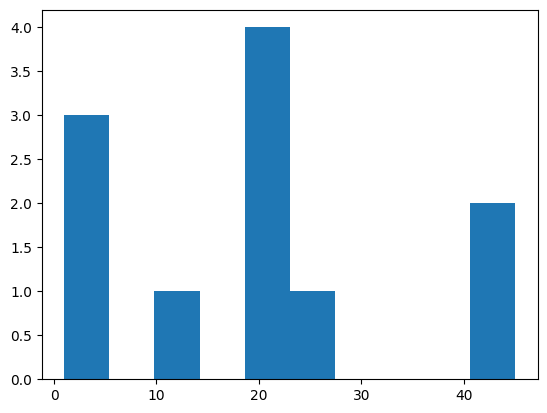

In [34]:
plt.hist(diffs)

# Naive merge

In [214]:
before = np.array([278, 230, 208, 224, 446, 365, 360, 292, 245, 245, 296])
after = np.array([277, 211, 205, 235, 424, 345, 341, 287, 219, 200, 254])
original_diff = abs(before.mean() - after.mean())
aggregated = np.concatenate((before, after))

In [215]:
diffs = np.zeros(1000)

for i in range(diffs.shape[0]):
    np.random.shuffle(aggregated)
    first_half, second_half = aggregated[:11], aggregated[11:]
    first_half_mean = first_half.mean()
    second_half_mean = second_half.mean()

    diffs[i] = abs(first_half_mean - second_half_mean)

greater_diffs_counter = (diffs > original_diff).sum()
p = greater_diffs_counter / len(diffs)
p

0.58

# Dataset duplication

In [208]:
before = np.array([278, 230, 208, 224, 446, 365, 360, 292, 245, 245, 296])
after = np.array([277, 211, 205, 235, 424, 345, 341, 287, 219, 200, 254])
diffs = after - before
aggregated_diffs = np.concatenate((diffs, -diffs))
aggregated_diffs

array([ -1, -19,  -3,  11, -22, -20, -19,  -5, -26, -45, -42,   1,  19,
         3, -11,  22,  20,  19,   5,  26,  45,  42])

In [209]:
means = np.zeros(100000)

for i in range(means.shape[0]):
    np.random.shuffle(aggregated_diffs)
    half = aggregated_diffs[:11]
    # other_half = aggregated_diffs[11:]
    mean = half.mean()
    means[i] = mean

mean_2_5 = np.percentile(means, 2.5)
mean_9_75 = np.percentile(means, 97.5)
print(f"95% CI: [{mean_2_5}, {mean_9_75}]")

95% CI: [-10.090909090909092, 10.090909090909092]


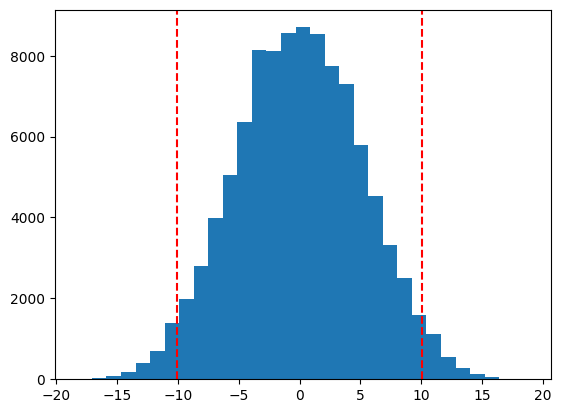

In [210]:
plt.hist(means, bins=31, label='mean')
plt.axvline(mean_2_5, color='r', linestyle='--', label='95% CI')
plt.axvline(mean_9_75, color='r', linestyle='--', label='95% CI')

# Random +/-

In [29]:
before = np.array([278, 230, 208, 224, 446, 365, 360, 292, 245, 245, 296])
after = np.array([277, 211, 205, 235, 424, 345, 341, 287, 219, 200, 254])
diffs = np.abs(after - before)
original_diff_mean = diffs.mean()
original_diff_mean

19.363636363636363

In [20]:
means = np.zeros(100000)

for i in range(means.shape[0]):
    mul = np.random.choice([-1, 1], size=diffs.shape)
    mean = np.dot(diffs, mul) / diffs.shape[0]
    means[i] = mean

mean_2_5 = np.percentile(means, 2.5)
mean_9_75 = np.percentile(means, 97.5)
print(f"95% CI: [{mean_2_5}, {mean_9_75}]")

95% CI: [-13.909090909090908, 13.909090909090908]


In [30]:
p = ((means > original_diff_mean).sum() + (means < -original_diff_mean).sum()) / len(means)
p

0.0

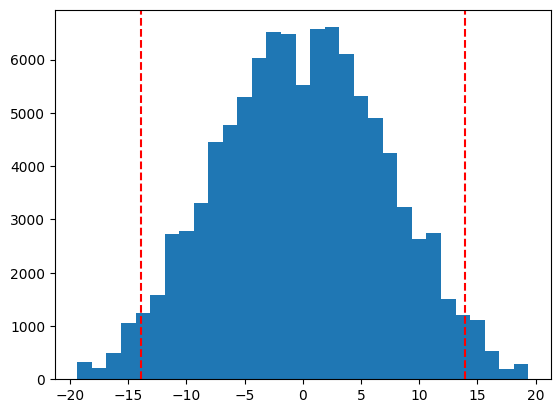

In [213]:
plt.hist(means, bins=31)
plt.axvline(mean_2_5, color='r', linestyle='--')
plt.axvline(mean_9_75, color='r', linestyle='--')

# Bootstrapping

In [56]:
before = np.array([278, 230, 208, 224, 446, 365, 360, 292, 245, 245, 296])
after = np.array([277, 211, 205, 235, 424, 345, 341, 287, 219, 200, 254])

diffs = after - before
diffs.mean()

-17.363636363636363

In [57]:
means = np.random.choice(diffs, size=(1000, diffs.shape[0]))
means = means.mean(axis=1)

means_2_5 = np.percentile(means, 2.5)
means_97_5 = np.percentile(means, 97.5)
print(f"95% CI: [{means_2_5}, {means_97_5}]")

95% CI: [-26.456818181818182, -6.99545454545455]


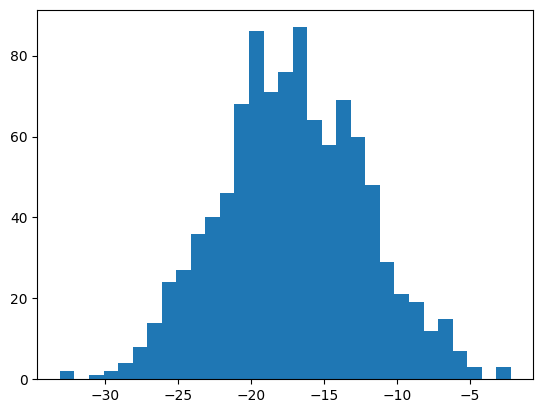

In [59]:
plt.hist(means, bins=31)
plt.show()

In [63]:
H0_diff = means.mean() - 0
p = ((means >= 0).sum() + (means <= H0_diff*2).sum()) / means.shape[0]
p

0.0

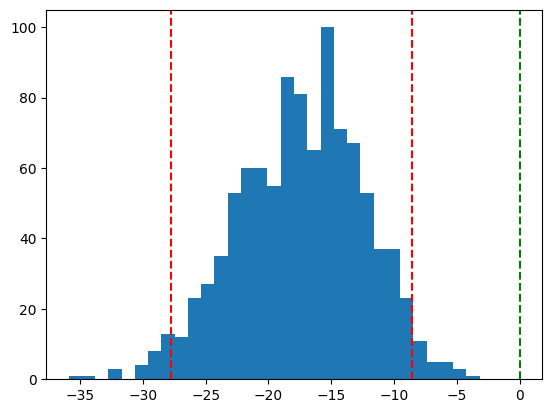

In [227]:

plt.hist(means, bins=31)
plt.axvline(means_2_5, color='r', linestyle='--')
plt.axvline(means_97_5, color='r', linestyle='--')
plt.axvline(0, color='green', linestyle='--')
plt.show()

# Offset bootstrapping

In [236]:
before = np.array([278, 230, 208, 224, 446, 365, 360, 292, 245, 245, 296])
after = np.array([277, 211, 205, 235, 424, 345, 341, 287, 219, 200, 254])
diffs = after - before
original_mean = diffs.mean()
diffs = diffs.astype(float) - original_mean

In [237]:
means = np.random.choice(diffs, size=(1000, diffs.shape[0]))
means = means.mean(axis=1)

means_2_5 = np.percentile(means, 2.5)
means_97_5 = np.percentile(means, 97.5)
print(f"95% CI: [{mean_2_5}, {mean_9_75}]")

95% CI: [-13.909090909090908, 13.909090909090908]


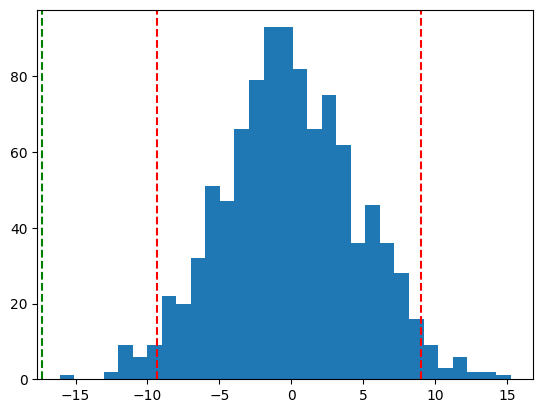

In [238]:

plt.hist(means, bins=31)
plt.axvline(means_2_5, color='r', linestyle='--')
plt.axvline(means_97_5, color='r', linestyle='--')
plt.axvline(original_mean, color='green', linestyle='--')
plt.show()